In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
data = pd.read_csv('data/ENB2012_data.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
data=data.drop(['Unnamed: 10','Unnamed: 11'], axis=1)

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [6]:
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution
# y1 Heating Load
# y2 Cooling Load

#data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
#               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [7]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [8]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [9]:
data.shape

(1296, 10)

In [10]:
pd.isnull(data).sum()

Relative Compactness         528
Surface Area                 528
Wall Area                    528
Roof Area                    528
Overall Height               528
Orientation                  528
Glazing Area                 528
Glazing Area Distribution    528
Heating Load                 528
Cooling Load                 528
dtype: int64

In [11]:
data.dropna(inplace=True) 

In [12]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [13]:
data.shape

(768, 10)

In [14]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


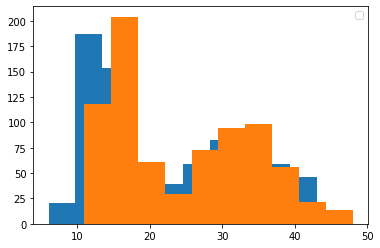

In [15]:
plt.hist(data['Heating Load'])
plt.hist(data['Cooling Load'])
plt.legend()

In [16]:
data['Heating Load'] = round(data['Heating Load'])
data['Cooling Load'] = round(data['Cooling Load'])

In [17]:
data.skew()

Relative Compactness         0.495513
Surface Area                -0.125131
Wall Area                    0.533417
Roof Area                   -0.162764
Overall Height               0.000000
Orientation                  0.000000
Glazing Area                -0.060254
Glazing Area Distribution   -0.088689
Heating Load                 0.359409
Cooling Load                 0.394242
dtype: float64

<AxesSubplot:>

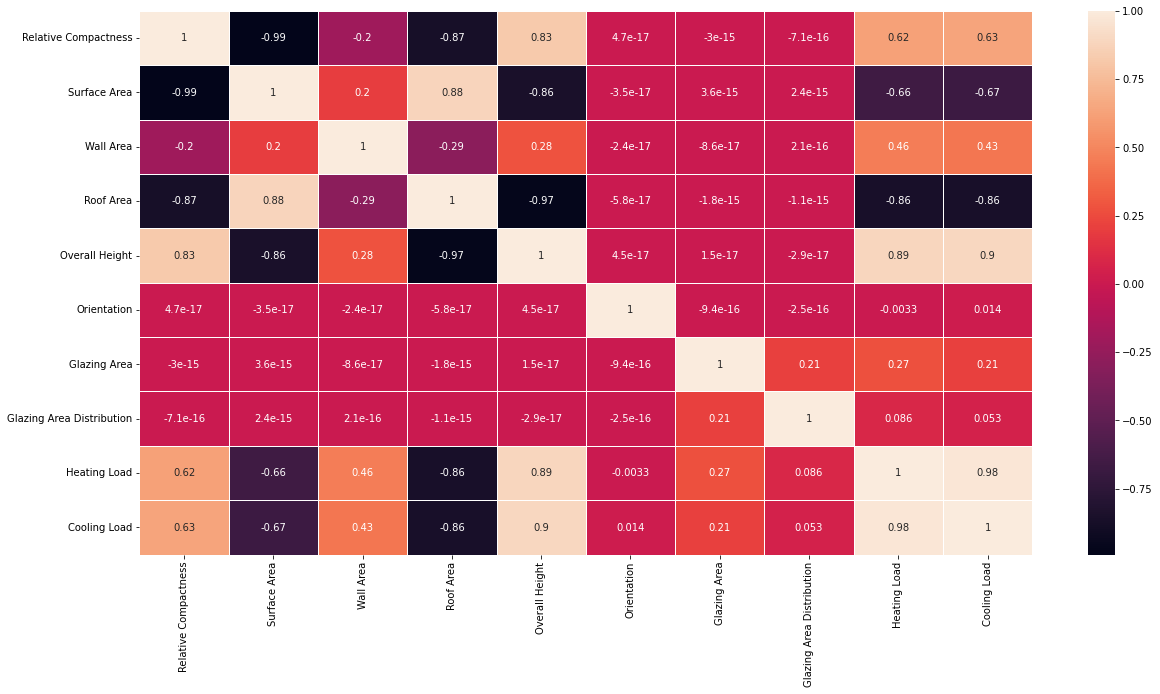

In [19]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

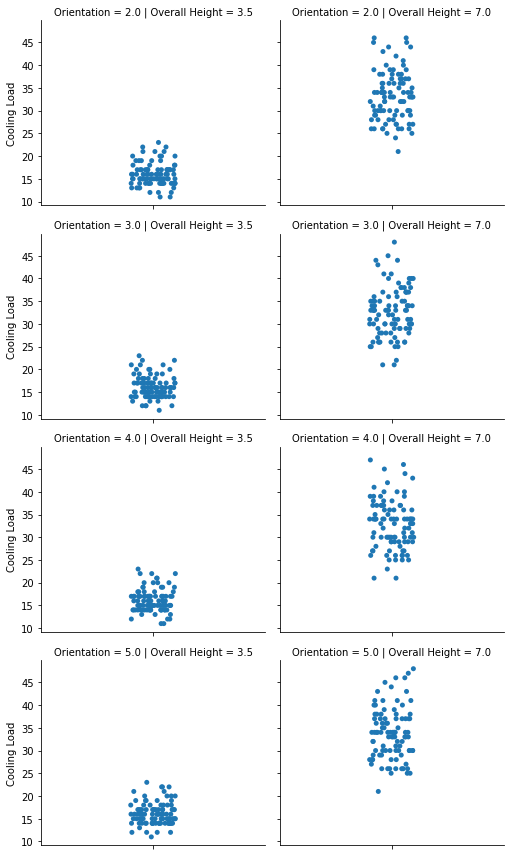

In [20]:
c = sns.catplot(y='Cooling Load',data=data,col='Overall Height',row='Orientation',
                height=3, aspect=1.2)

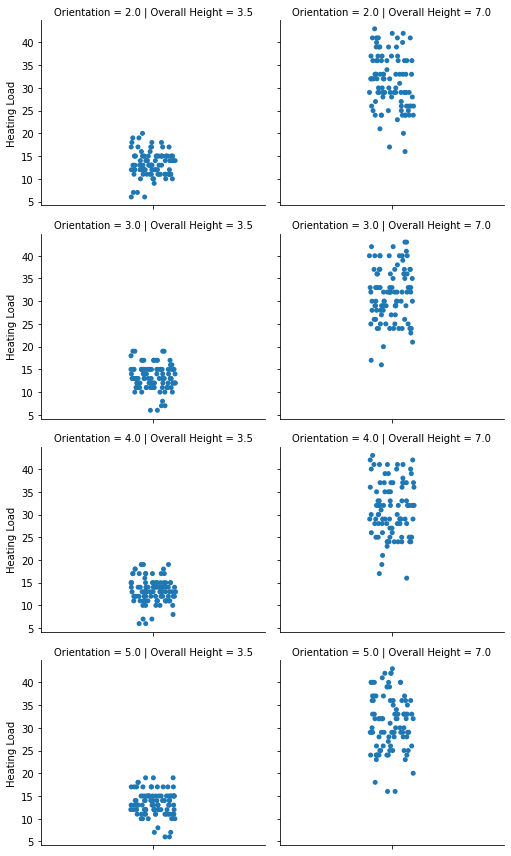

In [21]:
g = sns.catplot(y='Heating Load',data=data,col='Overall Height',row='Orientation',
                height=3, aspect=1.2)

In [22]:
data.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [23]:
class_counts_heat = data.groupby('Heating Load').size()
class_counts_cool = data.groupby('Cooling Load').size()

In [24]:
X = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

In [25]:
std = StandardScaler()
X_scaled = std.fit(X).transform(X)

In [26]:
lr = LogisticRegression(multi_class='auto',max_iter=2000)
model = lr.fit(X_scaled,y1)


In [28]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=24)

In [30]:
x1_train_sc, x1_test_sc, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.33, random_state=42)
x2_train_sc, x2_test_sc, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=24)

lr_hot = LogisticRegression(multi_class='auto',max_iter=2000)
lr_cold = LogisticRegression(multi_class='auto',max_iter=2000)

lr_hot.fit(x1_train_sc,y1_train)
lr_cold.fit(x2_train_sc,y2_train)

y1_pred_log = lr_hot.predict(x1_test_sc)
y2_pred_log = lr_cold.predict(x2_test_sc)

In [36]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
evaluate_model(y1_test,y1_pred_log)

(2.1929133858267718, 3.324331677549971, 0.8949354216041543)

In [38]:
evaluate_model(y2_test,y2_pred_log)

(2.4606299212598426, 3.7231981849492577, 0.8479045537444703)